<a href="https://colab.research.google.com/github/Shrey-12/MachineLearning/blob/main/Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
df.shape

(84431, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84431 entries, 0 to 84430
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           84431 non-null  object 
 1   Location       84431 non-null  object 
 2   MinTemp        83978 non-null  float64
 3   MaxTemp        84215 non-null  float64
 4   Rainfall       83484 non-null  float64
 5   Evaporation    45930 non-null  float64
 6   Sunshine       39291 non-null  float64
 7   WindGustDir    78880 non-null  object 
 8   WindGustSpeed  78887 non-null  float64
 9   WindDir9am     77070 non-null  object 
 10  WindDir3pm     81818 non-null  object 
 11  WindSpeed9am   83312 non-null  float64
 12  WindSpeed3pm   82706 non-null  float64
 13  Humidity9am    83152 non-null  float64
 14  Humidity3pm    82739 non-null  float64
 15  Pressure9am    74733 non-null  float64
 16  Pressure3pm    74780 non-null  float64
 17  Cloud9am       52530 non-null  float64
 18  Cloud3

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
# breaking down date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(columns=['Date'], inplace=True)

In [8]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


In [9]:
df.isna().sum()

Location             0
MinTemp            453
MaxTemp            216
Rainfall           947
Evaporation      38501
Sunshine         45140
WindGustDir       5551
WindGustSpeed     5544
WindDir9am        7361
WindDir3pm        2613
WindSpeed9am      1119
WindSpeed3pm      1725
Humidity9am       1279
Humidity3pm       1692
Pressure9am       9698
Pressure3pm       9651
Cloud9am         31901
Cloud3pm         32921
Temp9am            789
Temp3pm           1256
RainToday          948
RISK_MM              1
RainTomorrow         1
Year                 0
Month                0
Day                  0
dtype: int64

In [10]:
# filling null values with Mode
mode = ["WindGustDir", "WindDir9am", "WindDir3pm"]
df[mode]=df[mode].fillna(df.mode().iloc[0])

#filling null values with Back fill method
back = ['Cloud9am', 'Cloud3pm', 'RainToday']
df[back]=df[back].fillna(method ='bfill')

# filling null values with Mean
df = df.fillna(df.mean())

<ipython-input-10-496a27de7bff>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [11]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        1
RISK_MM          0
RainTomorrow     1
Year             0
Month            0
Day              0
dtype: int64

In [12]:
col = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
label = LabelEncoder()
for i in col:
    df[i] = label.fit_transform(df[i])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,0,13.4,22.9,0.6,5.025376,7.23469,13,44.0,13,14,...,8.0,2.0,16.9,21.8,0,0.0,0,2008,12,1
1,0,7.4,25.1,0.0,5.025376,7.23469,14,44.0,6,15,...,7.0,2.0,17.2,24.3,0,0.0,0,2008,12,2
2,0,12.9,25.7,0.0,5.025376,7.23469,15,46.0,13,15,...,7.0,2.0,21.0,23.2,0,0.0,0,2008,12,3
3,0,9.2,28.0,0.0,5.025376,7.23469,4,24.0,9,0,...,7.0,8.0,18.1,26.5,0,1.0,0,2008,12,4
4,0,17.5,32.3,1.0,5.025376,7.23469,13,41.0,1,7,...,7.0,8.0,17.8,29.7,0,0.2,0,2008,12,5


<Axes: >

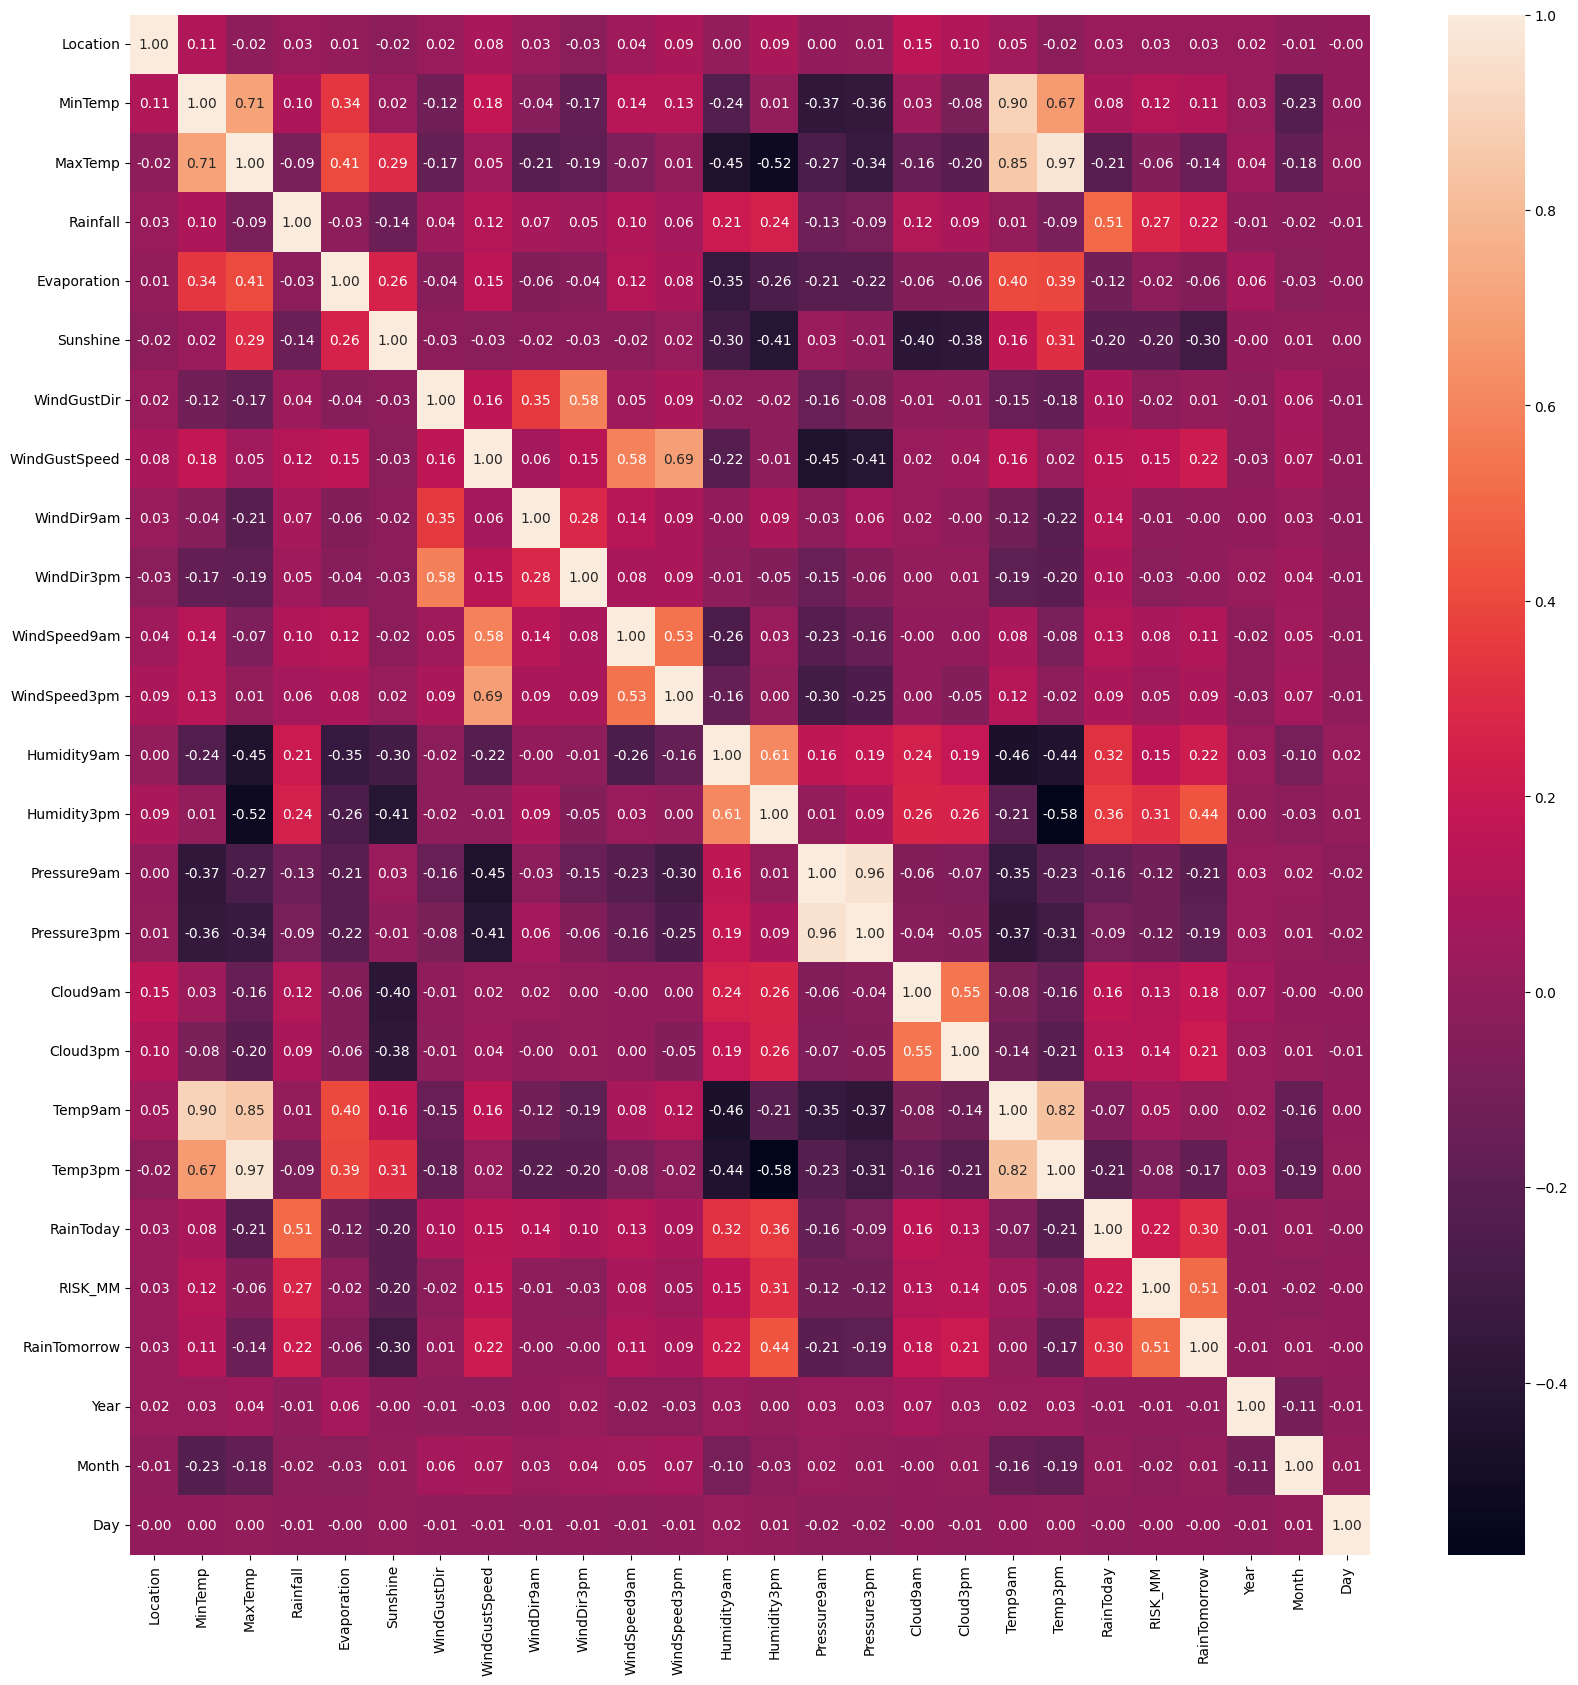

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot= True, fmt='.2f')

In [14]:
X = df.drop(columns = ['RainTomorrow'])
y = df['RainTomorrow']

In [15]:
X.shape

(84431, 25)

In [16]:
y.shape

(84431,)

In [17]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,Year,Month,Day
0,0.0,0.542079,0.531670,0.001617,0.034658,0.498944,0.866667,0.289062,0.866667,0.933333,...,0.477080,0.888889,0.25,0.536748,0.522073,0.0,0.000000,0.1,1.0,0.000000
1,0.0,0.393564,0.573896,0.000000,0.034658,0.498944,0.933333,0.289062,0.400000,1.000000,...,0.488964,0.777778,0.25,0.543430,0.570058,0.0,0.000000,0.1,1.0,0.033333
2,0.0,0.529703,0.585413,0.000000,0.034658,0.498944,1.000000,0.304688,0.866667,1.000000,...,0.504244,0.777778,0.25,0.628062,0.548944,0.0,0.000000,0.1,1.0,0.066667
3,0.0,0.438119,0.629559,0.000000,0.034658,0.498944,0.266667,0.132812,0.600000,0.000000,...,0.573854,0.777778,1.00,0.563474,0.612284,0.0,0.002695,0.1,1.0,0.100000
4,0.0,0.643564,0.712092,0.002695,0.034658,0.498944,0.866667,0.265625,0.066667,0.466667,...,0.458404,0.777778,1.00,0.556793,0.673704,0.0,0.000539,0.1,1.0,0.133333


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 100)

In [19]:
X_train.shape

(75987, 25)

In [20]:
X_test.shape

(8444, 25)

In [21]:
y_train.shape

(75987,)

In [22]:
y_test.shape

(8444,)

Accuracy Score of the model is: 0.9054950260540029
Confusion matrix is: 
 Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6501
           1       0.93      0.64      0.76      1943

    accuracy                           0.91      8444
   macro avg       0.92      0.81      0.85      8444
weighted avg       0.91      0.91      0.90      8444



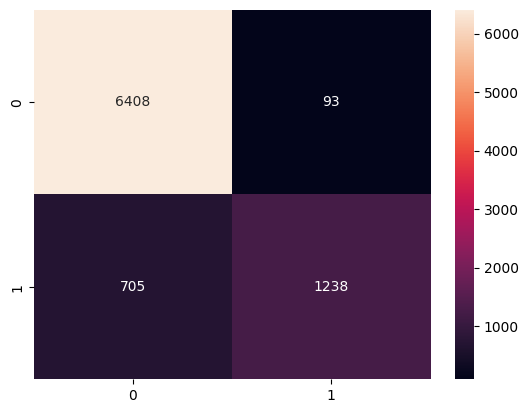

In [23]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f'Accuracy Score of the model is: {accuracy_score(y_test, y_pred_lr)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot = True, fmt = 'd')}")
print(classification_report(y_test, y_pred_lr))

In [24]:
# from sklearn.svm import SVC
# svm_model = SVC()
# svm_model.fit(X_train, y_train)
# y_pred_svm = svm_model.predict(X_test)
# print(f'Accuracy Score of the SVM model is: {accuracy_score(y_test, y_pred_svm)}')
# print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d')}")
# print(classification_report(y_test, y_pred_svm))

Accuracy Score of the KNN model is: 0.8197536712458551
Confusion matrix is: 
 Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6501
           1       0.67      0.43      0.52      1943

    accuracy                           0.82      8444
   macro avg       0.76      0.68      0.71      8444
weighted avg       0.81      0.82      0.80      8444



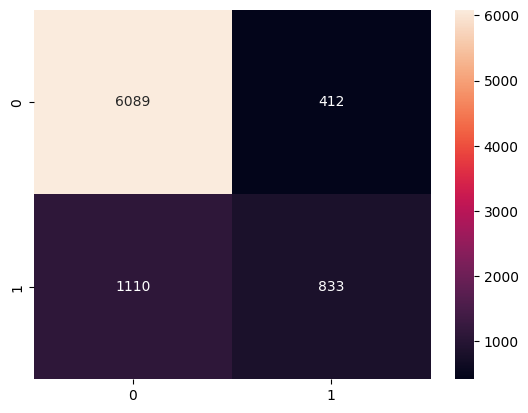

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print(f'Accuracy Score of the KNN model is: {accuracy_score(y_test, y_pred_knn)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d')}")
print(classification_report(y_test, y_pred_knn))

Accuracy Score of the Decision Tree model is: 1.0
Confusion matrix is: 
 Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6501
           1       1.00      1.00      1.00      1943

    accuracy                           1.00      8444
   macro avg       1.00      1.00      1.00      8444
weighted avg       1.00      1.00      1.00      8444



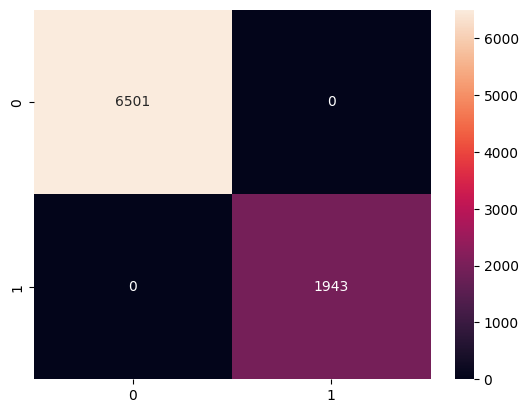

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(f'Accuracy Score of the Decision Tree model is: {accuracy_score(y_test, y_pred_dt)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')}")
print(classification_report(y_test, y_pred_dt))

Accuracy Score of the Naive Bayes model is: 0.9532212221695878
Confusion matrix is: 
 Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6501
           1       0.83      1.00      0.91      1943

    accuracy                           0.95      8444
   macro avg       0.92      0.97      0.94      8444
weighted avg       0.96      0.95      0.95      8444



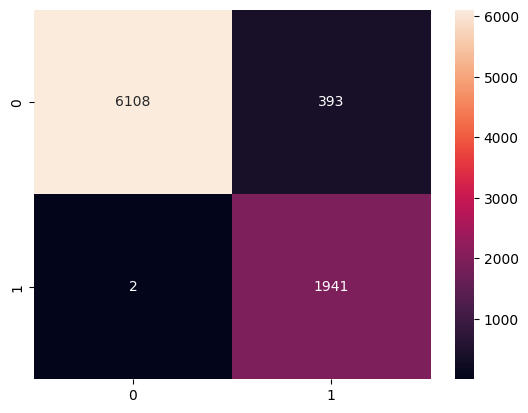

In [27]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print(f'Accuracy Score of the Naive Bayes model is: {accuracy_score(y_test, y_pred_nb)}')
print(f"Confusion matrix is: \n {sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d')}")
print(classification_report(y_test, y_pred_nb))